(As of 27.09.22)

# Notebook explaining the different configuration options 

In [2]:
###CONFIG DICTIONARY

#lists are sometimes necessary, especially if we use multiple proxy-DBs (e.g. SISAL and iso2k)
#and multiple timescales

cfg = {
#BASIC PARAMS
'vp':{
'd18O':'/home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc',
'tsurf': '/home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc',
'evap': '/home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc',
'slp': None,
},
'oro': None,
'reconstruct':['tsurf'], 
'output_folder':'ppe_sisal_vs_iso', #in cwd
'output_file':'Echam_sisal',
 'multi_model_prior': None, #None or a list where the first entry is a dictionary of dictionaries for the file paths and secord a dictionary with the orography files
'avg':None, 
'seed': 42, 
'check_nan':True, #mainly needed for iHadCM3, because of its missing years nans are introduced with 'resampled'
###PROXYS
'obsdata':['/home/mchoblet/paleoda/data/proxy_dbs/sisal_db.nc'],#,'/home/mchoblet/paleoda/data/proxy_dbs/iso2k_db.nc'],
'only_regional_proxies':False,
'regional_bounds':False,
'obs_var':[['d18O','d18O_precision']], #name of variables and uncertainties in proxy_db files
'proxy_error': [0.1], #irrelevant for PPE
'time_scales': ['median'], 
'proxy_time':['0851','1849'], 
'resample': True,
'resample_mode': 'nearest',
'mask': 3, 
###MULTI-TIMESCALE
'timescales':[1], #list of timescales (have to be true divisors of longest timescale (block size)) Timescale 1 always required! 
'reuse': True, #e.g if a yearly resolved proxy is also to be used in the 5,10 year mean reconstruction
###PSM
'psm':[None], 
'interpol':None, #None/'dw'
'var_psm': ['d18O'] ,
'speleo':{
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'mean', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
},
'icecore':{
    'weighting':'prec', #None(pure d18O) / prec (d180 prec weighted)
    'height': False, #height correction: True requires orography of model and 'elev' coordinate for proxy_db. Requires that proxy_db has a coordinate 'lapse rate' (e.g. i attributed -0.15 to non polar porxies and -0.28 to polar ones (per 100m)
    'filter': False, #If True the PSM-function from PRYSM which takes into account diffusion is applied. 
},
#currently this only works for one Database files, probably at some point that needs to be more flexible
'linear':{
    'variable': 'tsurf' , #variable to regress against
    'type': 'anom' , #absolute value or anomaly
    'anom_time': None , #None for full simulation, or time-list 
    'uniform': None, # if you just want one linear formula to rule them all [slope, intercept]
    #names of the regression parameters in the proxy-db
    'slope': 'slope' ,
    'intercept': 'intercept',
    'error': 'error', #make sure that the error in the database info is really the regression error *variance*, not standard error.
},
###PSEUDOPROXY-EXPERIMENTS (variable comes from var_psm)
'ppe': {
    'use': True,
    'SNR': [5], #signal to noise variance ratio
    'noise_type': 'w', #'w'/'r'
    'red_noise_a': 0.32, #autocorrelation for red noise
    'multi_timescale': [[1]], 
    'source': 'internal', #internal/external
    'other_model': 
    {'vp':{'tsurf':'/home/ldap-server/draco/cleaned_data/final/CESM_tsurf_850_1850.nc',
    'prec':'/home/ldap-server/draco/cleaned_data/final/CESM_prec_850_1850.nc',
    'd18O':'/home/ldap-server/draco/cleaned_data/final/CESM_d18O_850_1850.nc',
    'evap': '/home/ldap-server/draco/cleaned_data/final/CESM_evap_850_1850.nc'}},
    'oro': '/home/ldap-server/draco/orographies/final/icesm_oro.nc',
    'metrics_ppe': ['Corr','p_value','p_bootstrap','eff_p_value','CE','RMSE','RMSPE','MAE','MAPE'],
    'psm' : {'speleo':{   'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}, 'icecore': None},
},
    # cfg['ppe']['psm']= {'speleo':None, 'icecore': None} # if the config from above for the psm (which gives the obs-from-model) shall be different for the pseudoproxies.
#else just leave it as {'speleo':None, 'icecore': None} 
    
###KALMAN-FILTER
'time': ['0851','1849'], #Add zero for 3digit years (e.g. 0850)
'nens':100, #ensemble members
'reps':20, #Monte Carlo
'full_fields': True, 
'proxy_frac':None , 
'extra_assi': 
    {
        'globalmean':None, #None or list of variables
        'lat_mean': None, #None or list of variables
        'regionalmean': None, #None or list of variables
        'region':None, #None or list of list [[latS,latN],[latW,latE]] #specify the regions in 0-360 longitude system
        'prec_weighted': False, #if you want to get the precipitation weighted d18O
    },
'error_scale':1, 
'anomaly': None, #None or 'BG' / 'BG+HX' / 'HX'
'anomaly_time': None,
'cov_loc': None,
#evaluation metrics (which do not rely on a true state)
'metrics': [None],#['rank_histogram','rank_histogram_posterior','CD'], #['None']
}

# Explanation of the configuration

The config-dictionary is quite long. I go through each parameter and its meaning.
For tests of the parameters study the respective testing/tutorial notebook, which splits the wrapper in parts and tests the different configurations.

I tried to write the code in a modular way where the relevant data for functions is always explicitely given as an input, or part of the configuration-object.
To understand best what is done where, I encourage you to decompose the wrapper into it's part and look at the output in a Jupyter Notebook.

As there are some specifications for the model-prior files and the proxy data-files (in a table), I created two jupyter-notebook files which explain how I have created them:
* **notebook 1-Link**
* **notebook 2-Link**

**Warning**: If you want to change things in the dictionary from outside (for instance at cfg['mask']=3,), don't put the comma after the configuration, as this will seriously break things. The wrapper will think there is a tuple there instead of a number. Other configurations are also sensitive to that.


**Abreviations**

* PP: Pseudoproxy
* PPE: Pseudoproxy experiment
* KF: Kalman Filter
* EnKF: Ensemble Kalman Filter
* d18O: oxygen isotope ratio
* tsurf: surface temperature
* prec: precipitation
* evap: evaporation
* slp: sea level pressure
* db: database (refers to the proxy-tables)
* list: Python list of the form []. In this DA-Code lists are some times necessary to keep information about the different proxy-databases and the timescales which are reconstructed.

**Time of reconstruction**
There are two different time parameters that can seem a bit confusing, and I am not sure I have thought through/tested all combinations:

- proxy_time: This is the time-range imposed on the proxy-dbs. The proxy-dbs don't have to cover the whole time-range, as the imposing works with xarray-reindex, which expands with nans. Basically, the proxy time is the time range for estimating the time resolution of each record.

- time: The time which is reconstructed by the Kalman Filter. For test purposes, you could just compute a short time-slice as 1600-2000.

The safest thing is to go for a proxy_time/time combination that fits, e.g
[0,1999] for both when reconstruction e.g. on [1,5,10,25,50] timescales.
Or when using [1,3,6,12,24,48] use [0,2015].

For a start you can also just choose a few timescales, as [1,5] for example.

**Basic parameters**

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| vp | Dictionary with paths to climate fields.Vars must be named 'd18O','prec','tsurf','evap','slp'. Set path to None if you don't need a variable.| Make sure that also all variables required for PSM are include. Standard naming of variables as above mandatory, uniform timescale |
| oro | path to orogrophy file | 'None' or path (string) to nc-file. Var must be named 'oro' | Required for the PSMs which include height correction  |
| reconstruct | variables to reconstruct | List of variables e.g. ['d18O','prec','tsurf'] | vars must be included in vp. |
| output_folder | Name of output folder. Doesn't have to exist already (files will be stored in cwd/exp_xy/file_xy ) | e.g. 'exp_xy' |  |
| output_file | Name of output file. Old files won't be overwritten, a new file with an additional index will be created.| e.g. 'file_xy' |  |
| multi_model_prior| Either None (just use one model) or a list where first entry is dictionary with filepaths, and second entry is a dictionary with the orographies (does not have to be provided) | None /variable_name for list of dictionarise | |
| avg |  which months are used for computing the annual mean | None: jan-dec mean. int: specific start month (e.g. 4 for  April) or list of months ([12,1,2]))| |
| seed | seed-number for all the random indice selections and the pseudoproxy noise. important for reproducability | default: 42, any integer, or None | |
| check_nan| In the annual mean calculation, nans might be introduced in the case of the iHadcm3 prior (due to its missing years in between). This option deletes these years |True/False|

**Proxy Data**

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| obsdata | path to proxy-data tables | list of full paths ['/home/ldap-server/draco/notebooks/paleoda/paleoda/proxy_dbs/final/sisal_db.nc'] | also needed for PPEs (proxy locations are used)|
|how_many| From the start only a specific number of proxies are selected | number for each db [[50],50]] or None | | 
| obs_var | name of variables (+ uncertainty) in each obsdata-file | list of lists [['d18O','d18O_precision']] | If there is a linear PSM involved, instead of d18O_precision the error entry from below is taken (make sure its the variance, not the std error) |
| proxy_error | measurements error in each db. None means median error will be chosen | list of vals for each db e.g [0.1], [None] | resampling scheme requires a uniform error value. Error=0 breaks algorithm. |
| time_scales | To which resolution each proxy shall be resampled (then rounded to given timescales). Can be a fixed integer | possible entries of list: 'median', 'mean', 'min', 'max', integer | c.timescales |
| proxy_time | Time window in which the proxies are resampled. Not equal to 'time' in KF section | list of strings, e.g. ['0850','1850']. Extra zero for years before '1000' important. | **FIX: DOES IT AFFECT PP generation?** |
| resample | If the proxies should be processed via resampling procedure (upsampling, filtering, downfiltering, masking gaps without values in original timeseries). This is necessary for Multi-Timescale DA. Can also be set to False, then there will be a simple binning for the given resolution. Default is True.|True/False | --- |
| resample_mode | Interpolation mode in the proxy resampling procedure. Should not affect final result a lot. In a strict sense only 'nearest' (neighbor) interpolation conserves a multiyear mean. | 'nearest'/'linear' | --- |
| mask | maximum gap size ( times time-resolution) in resampling scheme. Larger gaps without values in original timeseries are masked by nans. | Integer, e.g. 3 | --- |
|only_regional_proxies | Option to cut proxies according to the next setting | True/False | It's also possible to create specific proxy database for that region, this way you will also have the opportunity to check the time series once. **FIX: Does it work?** |
|regional_bounds| setting of a specific region if you only want to reconstruct that one. Longitudes given in 0 to 360 degrees. can also cross the 0 meridian | [[latS,latN],[latW,latE]],[[-60,-40],[350,50]] or false/None | **FIX: Does it work?** |

**Multi timescale DA**

One can also decide not to use multi-timescale DA. That would mean to treat all proxies as annual values.
To that end: set the 'timescales' to 1 for each DB, and also set 'resample' to False.

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| timescales | Timescales to reconstruct in the DA. Defines blocks and sublocks for reconstruction. List of timescales, which have to be true divisors of longest timescale (block size)).Timescale 1 always required.| [1,5,10], [1,3,6,12,24,48], ... | Warning: For Pseudoproxy experiments we can attribute timescales to each database (for testing the influence of different timescales). Look in the 'ppe'['multi_timescale'] section. Here, do *not* set resolutions for each DB separately |
| reuse | If a yearly resolved proxy is also to be used for higher means, e.g if yearly resolved proxy is also averaged to 5,10,... year mean.  | True/False | Needs resample==True, or Pseudoproxies where this depends on the 'ppe' config. |


**Proxy System Models (PSMs)**

All the parameters that can be set for the proxy-system models.
It's all about extracting the right representative model value for a specific proxy record (HX^f in the Kalman Filter equation). I recomment to study the effect of PSMs on the model estimates first. The PSM doesn't only affect the mean value distribution of the modeled proxy values, but also the covariance relationships (cov(X^f,HX^f)). You can study the effect via Covariance-Distance plots (see 'metrics'=['CD'] option.

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| psm | --- | List, [None], ['speleo'], ['icecore'] | --- |
| interpol | Take nearest gridbox value from simulation, or take a distance weighted mean.  | None/'dw' | Height from orography file is always calculated via 'dw' due to some extreme offsets. **Nees fixing. Parallelized computation of distances causes troubles sometimes** |
| var_psm | Which modeled variable to use if psm is set to None. Naming convention as in 'vp'. One entry for each DB. | ['tsurf','tsurf'] | Only relevant if psm=[None]. **Connection to PPE-Config?** |

**Configurations for Speleo-PSM**

Might add some option for the fractionation formula and factors to be used.
Currently using same as recommended in Comas-Bru 2019 (Tremaine for calcite and Grossman for Aragonite).
I also have the option to do the fractionation with the yearly mean annual temperature or the temperature mean for the whole timeseries (the first leads to a further decreased covariance in the Kalman gain).

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| speleo['weighting'] | Apply precipitation/infiltration weighting to calculate annual mean d18O from monthly values.| None/'prec'/'inf' | --- |
| speleo['height'] | Correct for isotopic lapse rate due to model/proxy elevation difference. Lapse rate assumed -0.15 for isotopes and -0.65 for temperature| True/False | Also applied to temperature for fractionation. |
| speleo['fractionation'] | Account for calcite/aragonite fractionation. | True/False | requires 'tsurf' in 'vp' |
| speleo['fractionation_temp'] | If in the fractionation formula the mean temperature or time series is to be used (has an influence on the covariance) | 'mean'/'regular' | |
| speleo['filter'] | If to apply a convolution to the d18O signal like modeled for karst systems. Basically just takes out high freq variabilty. | True/False | --- |
| speleo['t_time'] | Transit time of the kalman Filter, used for convolution. | default 2.5 | --- |

**Configurations for Icecore-PSM**

The full icecore PSM for DA has been studied extensively by Nathan Steiger in his thesis/2017 paper.
I will probably just apply the precipitation weighting and the height correction.

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| icecore['weighting'] | Apply precipitation weighting to calculate annual mean d18O from monthly values. Here no infiltration weighting, as evap often zero. | None/'prec' | --- |
| icecore['height'] | Correct for isotopic lapse rate due to model/proxy elevation difference. Requires orography of model and 'elev' coordinate for proxy_db. Requires that proxy_db has a coordinate 'lapse rate' (e.g. i attributed -0.15 to non polar proxies and -0.28 to polar ones (per 100m)| True/False | ---|
| icecore['filter'] | If True the PSM-function from PRYSM which takes into account diffusion is applied. Function taken from Sylvia Dee/Feng Zhu. Takes several minutes, it's basically just kind of a filter. Not used in other Icecore DA studies. It's slow in the actual form (~7 minutes), but could for sure be optimized. The Feng Zhu version does something like that.| True/False |--- |

**Configurations linear regression-PSM**

currently this only works for one Database files, probably at some point that needs to be more flexible. I define which variable is to be regressed, if to use the anomalies or absolute values. The regression parameters have to be part of the proxy-db-file (and thus need to be precalculated.)

everything preficed with linear (because it's a subdictionary).

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| variable | variable to regress against | tsurf | --- |
| type | absolute value or anomaly | None or 'anom' | --- |
| uniform |  if you just want one linear formula to treat all sites equally |None or two entry list [slope, intercept] | --- |
| slope | name of slope in proxy-db | --- | --- |
| intercept |name of intercept in proxy-db  | --- | --- |
| error | name of error in proxy-db (make sure this is the regression error variance, not the standard error.) | --- | --- |

**Pseudoproxy experiments**

Settings for the pseudoproxies, which can also come from another model (source: 'external').
The noise is applied *after* computing multi-year averages and applying the psm-formulas.
The same configurations as in the 'PSM' section are applied. 
Here the timescales settings are a bit different, as they can be set for each database to allow for more interesting experiments. Make sure that all included timescales here correspond to the ones set in 'timescales'.

**MISSING**: A proxy check part like in the old wrapper, where we do pseudoproxy experiments using the real availability of proxies.
            -> Instead one can use only a reduced number of proxies in the proxy frac config (which also allows for setting an absolute number directly)
            
| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| ppe['use'] | use pseudoproxies or not | True/False | 'var_psm' sets which variables are used (as the PPs are computed on the basis of HXfull_all |
| ppe['SNR'] | signal to noise variance ratio of PPs, one entry for each db | [2] | --- |
|ppe['noise_bf_filt']| If true, the noise is added to the d18O signal before the karst filter a the firn diffusion (relevant only for specific d18O exps) |False/True| Only use that for d18O and when external model is set up (also needed if you use the same model) |
| ppe['noise_type'] | white or rednoise | 'w'/'r' | --- |
| ppe['red_noise_a'] | autocorrelation for red noise | float, e.g. 0.32 | Only relevant if using red noise for PPs |
| ppe['multi_timescale'] | List of timescales for each proxy DB. If you don't want to do Multi-timescale DA set value to 1 for each DB, else e.g.[[1,5],[10]]. Like this we can use proxies at different locations with different resolutions. | [[1,5,10]] | All timescales listed here must also be part of c.timescales! (to-do: fix that in kalman filter loop) |
| ppe['source'] | Choose between pseudoproxy from same or different model as the prior field (alternative physics experiments, influence of model bias) | 'internal'/'external' | Paths of simulation files for other model set in following parameter (**Need to be regridded**) |
| ppe['other_model']['vp'] | Paths to other model simulation. Same structure and naming as 'vp' above. Also excludes orography file from there. | e.g. {'tsurf':'/home/ldap-server/draco/cleaned_data/final/CESM_tsurf_850_1850.nc'}||
| ppe['oro'] | Path to orography from other model (needed for PSM, *I suggest not using it, as the HXfull computes on height difference to true proxy') ||'turn off height in psm'|
| ppe['metrics_ppe'] | Variety of metrics we can compute if we do PPEs where we know the true state. | list of metrics ['Corr','p_value','p_bootstrap','eff_p_value','CE','RMSE','RMSPE','MAE','MAPE', 'None']| --- |

**Proy-System-Model specification for the pseudoproxies:**

An interesting type of experiments can be ones where the pseudoproxies are created with a specific PSM configuration, and the reconstructions uses another config for estimating HXf (usally one would use the same) These kind of experiments were done in Dee 2016 https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016MS000677 . I think it would be particularly interesting for showing that the full psm with temperature fractionation ('regular' config above) is reconstructed better when the temperature is fixed to the mean ('mean') above because the temp-fractionation messes up covariance relationships (Hypothesis). In order to do this kind of experiments there is an extra option:

**If you want to use that for a single model experiment, add the original as an external source, it will only work like that** (else I'd have to rewrite too much in the code.)

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| ppe['psm'] | when same specification as above, it is a list of Nones (#number of proxy dbs), else you use a list of dictionaries with the same structure as cfg['speleo']/cfg['icecore'] above | None | --- |


**Kalman Filter loop**

The Ensemble Square Root Kalman Filter applied here is the Ensemble Transform Kalman Filter. It could also be another filter. I have implemented a few https://github.com/mchoblet/ensemblefilters , look there for comments on the speed of algorithms. For some simple visualization of how the prior climate field is affected by the measurements the serial Kalman Filter is really cool.
Update 24.09.22: added covariance localization option (Tierney 2020, Osman 2021).

Extra_assi are some extra variables we want to reconstruct with the algoritm. The proxy-estimates are also assimilated, as this is releveant for the multi-timescale DA approach. These etra variables are also saved in the final nc-file.

| Names | Meaning | Values | Connection to other parameters |
| --- | --- | --- | --- |
| time | Time limits in Kalman Filter. Additional zero for years before '1000' important  | ['0850','1850'] | 'proxy_time' might be longer for the resampling/time-scale estimation of the proxies. **Does it work in comparison to proxy_time?** |
| nens | Number of ensemble members (refers to single model) | 100 | is multiplied internally by the number of models used when doing the multimodelensemble |
| reps | Number of monte carlo repetitions with different priors | 20 | --- |
| full_fields | In case only global mean wants to be obtained, the fields do not need to be assimilated (faster!). Default is True. | True/False | --- |
| proxy_frac | Fraction of proxies to assimilate in each Monte Carlo repetition or the absolute number of proxies to use | None/float between 0 and 1, or integer larger than one | --- |
| extra_assi['globalmean'] | Reconstruct global mean value directly | List of variables ['tsurf','prec',...]   | --- |
| extra_assi['lat_mean'] | Reconstruct latitudinal mean temperature directly | List of variables ['tsurf','prec',...] | --- |
| extra_assi['regionalmean'] | Variable for which a specific regional mean is to be assimilated | list of variables ['tsurf','prec',...] | region defined in next parameter. This can also be computed from full_fields after DA. |
| extra_assi['region'] | Specification of latitudes and longitudes of region | list of lists [[latS,latN],[latW,latE]], longitudes between 0 and 360 | --- |
| extra_assi['prec_weighted'] | If precipitation weighted d18O is also to be reconstructed | True/False | --- |
| error_scale | Factor by which the proxy error is modified for all proxies. Can be used for "tuning" the reconstruction (e.g. Tierney 2020, Osman 2021)   | default 1, float between 0 and 1 for reduction | --- |
| anomaly | If to compute the annomalies of the climate field (many DA studies work in anomaly space because of biases). Option to compute anomalies of Background (BG, the prior), or also the Proxy estimates and proxies  | None or 'BG'/'BG+HX'/'HX'| reference time for anomaly set in next parameter |
| anomaly_time | Reference period for anomaly calculation. None means the whole time period. If also debiasing 'HX' its better to use None, as proxy record do not cover each time.   | None list['start-year','end-year'] | Make this time is included in what you have set in 'proxy_time' and 'time' |
| 'metrics' | evaluation metrics (which do not rely on a true state). Either rank histograms for prior/posterior or covariance-distance calculations between proxy estimate and background field. CD is saved in a separate file.  | ['rank_histogram','rank_histogram_posterior','CD'] or [None] if you don't want anything. | |
| cov_loc| if covariance localization is to be used. If yes, the gaspari cohn 5th order is used. Makes DA Loop 2-3 times slower | None or value in km |  |

In [137]:
#Loading python files + packages. Adptations to jupyter notebooks for convenience

import sys
sys.path.append('/home/mchoblet/paleoda')

import xarray as xr
import numpy as np
from types import SimpleNamespace

import wrapper_new

import dataloader
import utils
import psm_pseudoproxy
import kalman_filters
import evaluation
import wrapper

import warnings
import copy

from numba import njit,prange,vectorize
import xskillscore as xss

import os
import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import cartopy.crs as ccrs
from scipy.stats import linregress
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  


In [12]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down');

<IPython.core.display.Javascript object>

In [145]:
cfg = {
#BASIC PARAMS
'vp':{
'd18O':'/home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc'
},
'oro': None,
'reconstruct':['tsurf','d18O','prec'], 
'output_folder':'ppe_wrapper_test', #in cwd
'output_file':'Echam_sisal',
 'multi_model_prior': None, #None or a list where the first entry is a dictionary of dictionaries for the file paths and secord a dictionary with the orography files
'avg':None, 
'seed': 42, 
'check_nan':False, #mainly needed for iHadCM3, because of its missing years nans are introduced with 'resampled'
###PROXYS
'obsdata':['/home/mchoblet/paleoda/data/proxy_dbs/sisal_db.nc'],#,'/home/mchoblet/paleoda/data/proxy_dbs/iso2k_db.nc'],
'obs_var':[['d18O','d18O_precision']], #name of variables and uncertainties in proxy_db files
'proxy_error': [0.1], #irrelevant for PPE
'time_scales': ['median'], 
'proxy_time':['0851','1849'], 
'resample': True,
'resample_mode': 'nearest',
'mask': 3, 
###MULTI-TIMESCALE
'timescales':[1], #list of timescales (have to be true divisors of longest timescale (block size)) Timescale 1 always required! 
'reuse': True, #e.g if a yearly resolved proxy is also to be used in the 5,10 year mean reconstruction
###PSM
'psm':[None], 
'interpol':None, #None/'dw'
'var_psm': ['d18O'] ,
'speleo':{
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'mean', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
},
'icecore':{
    'weighting':'prec', #None(pure d18O) / prec (d180 prec weighted)
    'height': False, #height correction: True requires orography of model and 'elev' coordinate for proxy_db. Requires that proxy_db has a coordinate 'lapse rate' (e.g. i attributed -0.15 to non polar porxies and -0.28 to polar ones (per 100m)
    'filter': False, #If True the PSM-function from PRYSM which takes into account diffusion is applied. 
},
###PSEUDOPROXY-EXPERIMENTS (variable comes from var_psm)
'ppe': {
    'use': True,
    'SNR': [5], #signal to noise variance ratio
    'noise_type': 'w', #'w'/'r'
    'red_noise_a': 0.32, #autocorrelation for red noise
    'multi_timescale': [[1]], 
    'source': 'internal', #internal/external
    'other_model': 
    {'vp':{'d18O':'/home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc'},
    'oro': '/home/ldap-server/draco/orographies/final/icesm_oro.nc'},
    'metrics_ppe': ['Corr','p_value','p_bootstrap','eff_p_value','CE','RMSE','RMSPE','MAE','MAPE']
    },
    
###KALMAN-FILTER
'time': ['0851','1849'], #Add zero for 3digit years (e.g. 0850)
'nens':100, #ensemble members
'reps':2, #Monte Carlo
'full_fields': True, 
'proxy_frac':None , 
'extra_assi': 
    {
        'globalmean':None, #None or list of variables
        'lat_mean': None, #None or list of variables
        'regionalmean': None, #None or list of variables
        'region':None, #None or list of list [[latS,latN],[latW,latE]] #specify the regions in 0-360 longitude system
        'prec_weighted': False, #if you want to get the precipitation weighted d18O
    },
'error_scale':1, 
'anomaly': None, #None or 'BG' / 'BG+HX' / 'HX'
'anomaly_time': None,
'cov_loc': None,
#evaluation metrics (which do not rely on a true state)
'metrics': [None],#['rank_histogram','rank_histogram_posterior','CD'], #['None']
}

In [6]:
multi_prior=[{
'iCESM':{'d18O':'/home/mchoblet/paleoda/data/model_data/upsampled/CESM_d18O_850_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/upsampled/CESM_evap_850_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/upsampled/CESM_prec_850_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/upsampled/CESM_tsurf_850_1850.nc',
       },
'isoGSM':{'d18O':'/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_d18O_851_1850.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_evap_851_1850.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_prec_851_1850.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_tsurf_851_1850.nc',
       },    
'Echam':{'d18O':'/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_tsurf_850_1849.nc',
       },
'GISS':{'d18O':'/home/mchoblet/paleoda/data/model_data/upsampled/GISS_d18O_850_1849.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/upsampled/GISS_evap_850_1849.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/upsampled/GISS_prec_850_1849.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/upsampled/GISS_tsurf_850_1849.nc',
'slp': '/home/mchoblet/paleoda/data/model_data/upsampled/GISS_slp_850_1849.nc',
       },
'iHadCM3':{'d18O':'/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_d18O_801_1952.nc',
'evap':'/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_evap_801_1952.nc',
'prec':'/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_prec_801_1952.nc',
'tsurf':'/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_tsurf_801_1952.nc',
'slp':'/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_slp_801_1952.nc',
       }
},
#I checked once again that nothing with the longitudes is wrong (all go from 0 to 360)
{
    'isoGSM':'/home/mchoblet/paleoda/data/orographies/upsampled/ccsm_oro.nc',
'Echam': '/home/mchoblet/paleoda/data/orographies/upsampled/echam_oro.nc',
'GISS':'/home/mchoblet/paleoda/data/orographies/upsampled/giss_oro.nc',
'iHadCM3':'/home/mchoblet/paleoda/data/orographies/upsampled/hadcm3_oro.nc',
'iCESM':'/home/mchoblet/paleoda/data/orographies/upsampled/icesm_oro.nc',
}]

In [147]:
#experiment where both pseudoproxies and HXfull use the regular fractionation_temp. Extremely high SNR

cfg2=cfg.copy()
cfg2['proxy_time']=['0850','1849'] #here fitting to pseudoproxies from the echam-model
cfg2['time']=['0850','1849']
cfg2['psm']=['speleo']
cfg2['var_psm'] = ['d18O']
cfg2['speleo']['fractionation_temp']='regular'
cfg2['ppe']['psm']= {'speleo':None, 'icecore': None} 
cfg2['reps']=2
cfg2['nens']=40
cfg2['timescales']=[1]
cfg2['proxy_frac']=70 #trying to use a fixed number of proxies each other
cfg2['ppe']['source']='external'
cfg2['anomaly']='BG+HX'
cfg2['cov_loc']=None
cfg2['multi_model_prior']=None
cfg2['ppe']['multi_timescale']= [[1]]
cfg2['ppe']['SNR']=[5]
ds_with=wrapper.paleoda_wrapper(cfg2)

>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use time-varying temperature
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Load d18O  from  /home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/

100%|██████████| 2/2 [00:28<00:00, 14.00s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec


In [152]:
utils.globalmean(ds_with['tsurf_Corr'])

<xarray.DataArray 'gm_' ()>
array(0.36035205)

In [151]:
utils.globalmean(ds_without['tsurf_Corr'])

<xarray.DataArray 'gm_' ()>
array(0.33831346)

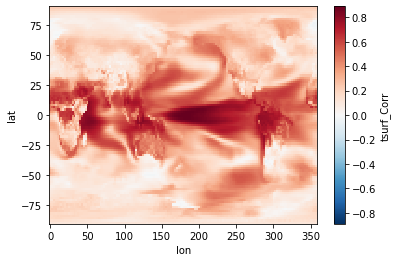

In [155]:
#old, no psm
ds_with['tsurf_Corr'].plot()

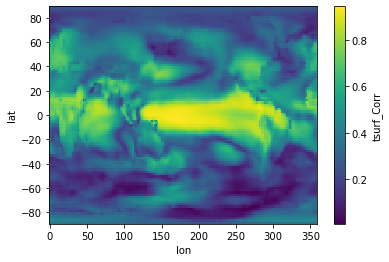

In [119]:
#old, no psm
ds_with['tsurf_Corr'].plot()

In [125]:
utils.globalmean(ds_with['tsurf_CE'])

<xarray.DataArray 'gm_' ()>
array(0.19408779)

In [148]:
#experiment where only pseudoproxies the regular (time-varying) fractionation_temp. Extremely high SNR=10
cfg2=cfg.copy()
cfg2['proxy_time']=['0850','1849'] #here fitting to pseudoproxies from the echam-model
cfg2['time']=['0850','1849']
cfg2['psm']=['speleo']
cfg2['var_psm'] = ['d18O']
cfg2['speleo']['fractionation_temp']='mean'
cfg2['ppe']['psm']= {'speleo':{
    'weighting':'inf', #None(pure d18O) / prec (d180 prec weighted)/ inf (d18O prec-evap weighted)
    'height': False, #height correction: True requires orography of model + proxy_db must have a coordinate 'elev'. Lapse rate assumed -0.28 for isotopes and -0.65 for temperature
    'fractionation':True, #requires tsurf (in 'vp')
    'fractionation_temp': 'regular', #'regular'
    'filter': False, #True: convolution of yearly means with 2.5 year transit time, or float: transit time
    't_time': 2.5, #if filter equal true, use this as a transit time
}, 'icecore': None} 
cfg2['reps']=2
cfg2['nens']=40
cfg2['timescales']=[1]
cfg2['proxy_frac']=70 #trying to use a fixed number of proxies each other
cfg2['ppe']['source']='external'
cfg2['anomaly']='BG+HX'
cfg2['cov_loc']=None
cfg2['multi_model_prior']=None
cfg2['ppe']['multi_timescale']= [[1]]
cfg2['ppe']['SNR']=[10]
ds_without=wrapper.paleoda_wrapper(cfg2)

>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc
computing yearly average
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/CESM_tsurf_850_1850.nc
computing yearly average
USING SPELEO PSM
>>>>>>>>>>>>>GETTING MONTHLY d18O Data
>>>>>>>>>>>>>APPLYING FRACTIONATION
use mean temperature
COMPUTE ANOMALIES IN MODE: BG+HX
GENERATING PSEUDOPROXIES FROM MODEL OTHER THAN PRIOR
Changed Pseudoproxy-PSM-Config for  speleo
Load d18O  from  /home/mchoblet/paleoda/data/model_data/CESM_d18O_850_1850.nc
computing yearly average
Load evap  from  /home/mchoblet/paleoda/data/model_data/CESM_evap_850_1850.nc
computing yearly average
Load prec  from  /home/mchoblet/paleoda/data/model_data/CESM_prec_850_1850.nc
computing yearly average
Load tsurf 

100%|██████████| 2/2 [00:26<00:00, 13.37s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf
Compute pseudoproxy metrics for  d18O
Compute pseudoproxy metrics for  prec


In [126]:
utils.globalmean(ds_without['tsurf_CE'])

<xarray.DataArray 'gm_' ()>
array(0.19408779)

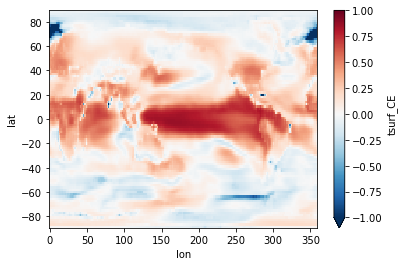

In [122]:
ds_without['tsurf_CE'].plot(vmin=-1)

In [74]:
#new, only 50 proxies. no bias correction
utils.globalmean(ds['tsurf_CE'])

<xarray.DataArray 'gm_' ()>
array(0.09146199)

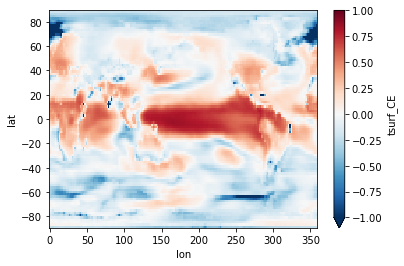

In [71]:
#new plots where model bias has been removed! (anomaly, also )

ds['tsurf_CE'].plot(vmin=-1)

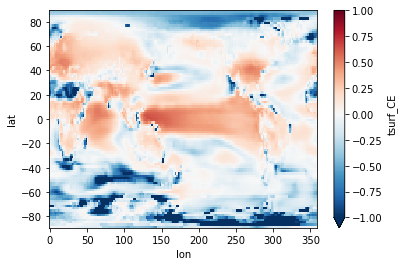

In [53]:
#new, only 50 proxies. no bias correction
ds['tsurf_CE'].plot(vmin=-1)

In [68]:
#new, 70 proxies with debiasing
utils.globalmean(ds['tsurf_Corr'])

<xarray.DataArray 'gm_' ()>
array(0.5187087)

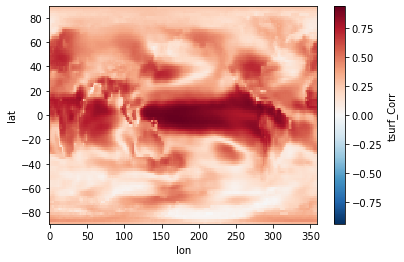

In [31]:
#old, with all proxies
ds['tsurf_Corr'].plot()

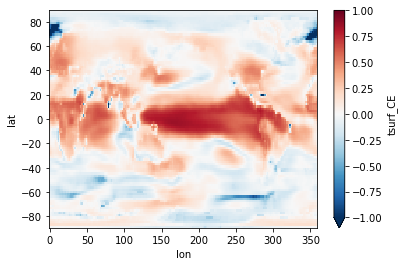

In [49]:
ds['tsurf_CE'].plot(vmin=-1)

In [45]:
ds.data_vars

Data variables:
    tsurf_mean         (time, lat, lon) float64 255.8 255.8 ... 228.8 228.7
    tsurf_std          (time, lat, lon) float64 0.79 0.7912 ... 0.9367 0.9341
    tsurf_Corr         (lat, lon) float64 0.2515 0.2519 0.2523 ... 0.3169 0.316
    tsurf_p_value      (lat, lon) float64 6.881e-16 6.107e-16 ... 1.274e-24
    tsurf_p_bootstrap  (lat, lon) float64 101.0 101.0 101.0 ... 101.0 101.0
    tsurf_eff_p_value  (lat, lon) float64 6.881e-16 6.107e-16 ... 1.274e-24
    tsurf_CE           (lat, lon) float64 -0.04971 -0.0496 ... -0.0132 -0.01526
    tsurf_RMSE         (lat, lon) float64 0.8881 0.888 0.8882 ... 0.7644 0.764
    tsurf_RMSPE        (lat, lon) float64 0.3465 0.3465 0.3465 ... 0.3334 0.3333
    tsurf_MAE          (lat, lon) float64 0.7111 0.7108 0.7107 ... 0.6102 0.6107
    tsurf_MAPE         (lat, lon) float64 0.002775 0.002774 ... 0.002665
    HXf_m              (time, site) float64 -10.14 -2.829 ... -4.384 -6.609
    HXf_std            (time, site) float64 -10.14 -

In [15]:
#retest the previous thing with covariance - localization
#can I plot the results here?? No annoying df_type bool error?


cfg2=cfg.copy()
cfg2['proxy_time']=['0850','1849'] #here fitting to pseudoproxies from the echam-model
cfg2['time']=['0850','1849']
cfg2['nens']=40
cfg2['timescales']=[1,10,20]
cfg2['proxy_frac']=0.75
cfg2['ppe']['source']='internal'
cfg2['cov_loc']=None#12500
cfg2['multi_model_prior']=None
cfg2['ppe']['multi_timescale']= [[1,10,20]]
ds2=wrapper_new.paleoda_wrapper(cfg2)

>>>>>LOADING PROXY DATA
Load d18O  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_d18O_850_1849.nc
computing yearly average
Checking prior for nans
Load prec  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_prec_850_1849.nc
computing yearly average
Checking prior for nans
Load tsurf  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_tsurf_850_1849.nc
computing yearly average
Checking prior for nans
Load evap  from  /home/mchoblet/paleoda/data/model_data/ECHAM5_evap_850_1849.nc
computing yearly average
Checking prior for nans
GENERATING PSEUDOPROXIES FROM SAME MODEL
>>>>>>>>>>>>GENERATING pseudoproxies with SNR: 5
Start Multitimescale DA loop.


100%|██████████| 2/2 [00:08<00:00,  4.38s/it]


Finished multitimescale DA
Save variables
Compute pseudoproxy metrics for  tsurf


In [144]:
utils.globalmean(ds2['tsurf_Corr'])

<xarray.DataArray 'gm_' ()>
array(0.4800452)

In [ ]:
'numpy.dtype[bool_]' object is not callable

In [110]:
import matplotlib.pyplot as plt